<a href="https://colab.research.google.com/github/Prophetcze/MPA-MLF/blob/main/Mini_project/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPA-MLF Miniproject - Classification of wireless transmitters
Task was to determine the number of wireless transmitters based on the hardware imperfections. We were provided with the dataset of some measured values. The dataset consists of 19200 samples and 9 features in total.

In [9]:
# Import of used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
# Loading the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')
path_to_dataset = '/content/drive/MyDrive/Data/Data_prepared_final.csv'

dataset = pd.read_csv(path_to_dataset)

dataset = dataset.iloc[:,2:] # Ignoring first two columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Printing the dataset to see what we loaded
dataset

,cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...
19195,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


In [12]:
# Adding scaler
scaler = StandardScaler()
dataset_normalized = scaler.fit_transform(dataset)

In [15]:
# List to store silhouette values ​​for individual values K
silhouette_scores = []

# Number of clusters
k_all = range(2, 30)

# Calculation of silhouette values for all K
for k in k_all:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset_normalized)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(dataset_normalized, labels)
    silhouette_scores.append(silhouette_avg)

# Obtaining the optimal value of K (in our case number of BTS devices)
optimal_k = np.argmax(silhouette_scores) + 2  # Adding 2, because index begins from 0 and number of clusters from 2

Number of BTS based on calculation by used method: 10


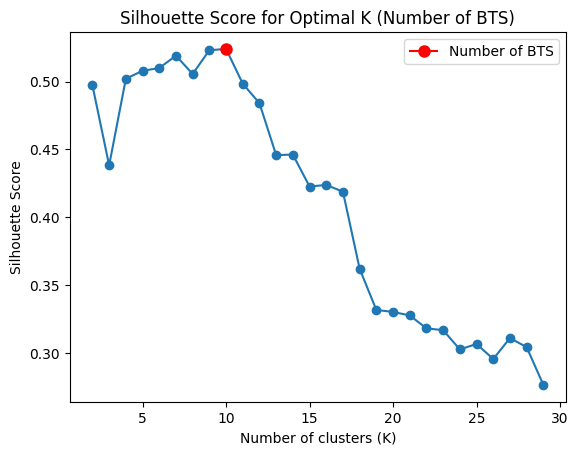

In [34]:
# Showing the results
print("Number of BTS based on calculation by used method:", optimal_k)

plt.figure()
plt.plot(k_all, silhouette_scores, marker='o')
plt.plot(optimal_k, silhouette_scores[8], marker='o', markersize=8, label='Number of BTS', color='red')
plt.legend()
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K (Number of BTS)')
plt.show()